# Import Statements

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import cross_validation
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot    
import plotly.graph_objs as go
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.cross_validation import train_test_split
import keras

# Loading Data

In [38]:
white_wine = pd.read_csv("/home/user/Downloads/Wine/white.csv", sep=";",header=None)
red_wine = pd.read_csv("/home/user/Downloads/Wine/red.csv", sep=";",header=None)
red_wine.drop(red_wine.columns[0],axis=0,inplace=True)
white_wine.drop(white_wine.columns[0],axis=0,inplace=True)
red_white = pd.DataFrame()
red_white = pd.DataFrame(red_white.append([white_wine,red_wine])).reset_index()

In [39]:
red_white.drop(red_white[['index']],axis=1,inplace=True)

# Fixing Parameters

In [40]:
batch_size = 10
num_classes = 3
epochs = 10
z = [keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=3, verbose=1, mode='max')]

# Function for data operations

In [41]:
def data(dataf):
    
    dataf = dataf.astype(float)
    
    #categorizing the data
    white1 = dataf[dataf[11]>=7]
    white1[11] = 2
    white2 = dataf[(dataf[11]>3) & (dataf[11]<7)]
    white2[11] = 1
    white3 = dataf[dataf[11]<=3]
    white3[11] = 0
    white_2 = pd.DataFrame()
    white_2= pd.DataFrame(white_2.append([white1,white2,white3]))
    
    #test-train split
    x_train, x_test = train_test_split(white_2, train_size = 0.8)
    y_train = pd.DataFrame(x_train[11])
    y_test = pd.DataFrame(x_test[11])
    x_train.drop(x_train.columns[11],axis=1,inplace=True)
    x_test.drop(x_test.columns[11],axis=1,inplace=True)
    
    #normalize the data
    x_train = (x_train - x_train.mean()) / (x_train.max() - x_train.min())
    x_test = (x_test - x_test.mean()) / (x_test.max() - x_test.min())
    
    #converting data to numpy array
    xtrain = np.array(x_train.as_matrix(),dtype=np.float64)
    xtest=np.array(x_test.as_matrix(),dtype=np.float64)
    ytrain=np.array(y_train.as_matrix(),dtype=np.float64)
    ytest=np.array(y_test.as_matrix(),dtype=np.float64)
    
    #one hot encoding for the categories
    ytrain = keras.utils.to_categorical(ytrain, num_classes)
    ytest = keras.utils.to_categorical(ytest, num_classes)
    
    return xtrain, xtest, ytrain, ytest

# Function for plotting the graph

In [42]:
def plotting(model_1):
    plt.plot(model_1.history['acc'])
    plt.plot(model_1.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(model_1.history['loss'])
    plt.plot(model_1.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Choosing the dataset

In [43]:
xtrain, xtest, ytrain, ytest = data(red_white)

/home/user/Stackroute/p3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/user/Stackroute/p3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/user/Stackroute/p3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

# Model 1 : 1 hidden layer

Train on 4157 samples, validate on 1040 samples
Epoch 1/10
3s - loss: 0.4654 - acc: 0.8030 - val_loss: 0.4171 - val_acc: 0.8231
Epoch 2/10
3s - loss: 0.4347 - acc: 0.8114 - val_loss: 0.3878 - val_acc: 0.8346
Epoch 3/10
3s - loss: 0.4300 - acc: 0.8165 - val_loss: 0.3727 - val_acc: 0.8385
Epoch 4/10
3s - loss: 0.4192 - acc: 0.8196 - val_loss: 0.3813 - val_acc: 0.8317
Epoch 5/10
3s - loss: 0.4197 - acc: 0.8193 - val_loss: 0.3721 - val_acc: 0.8327
Epoch 6/10
3s - loss: 0.4156 - acc: 0.8213 - val_loss: 0.3686 - val_acc: 0.8423
Epoch 00005: early stopping


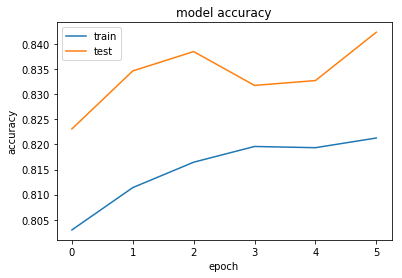

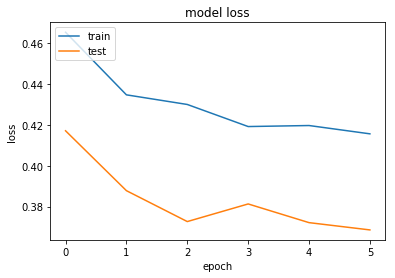

In [44]:
model1 = Sequential()
model1.add(Dense(600, activation='relu', input_shape=(11,)))
model1.add(Dense(500, activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_1 = model1.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=z)
plotting(model_1)

# Model 2 : 2 hidden layer

Train on 4157 samples, validate on 1040 samples
Epoch 1/10
6s - loss: 0.4554 - acc: 0.8044 - val_loss: 0.4514 - val_acc: 0.8192
Epoch 2/10
6s - loss: 0.4250 - acc: 0.8114 - val_loss: 0.4346 - val_acc: 0.8212
Epoch 3/10
6s - loss: 0.4205 - acc: 0.8208 - val_loss: 0.4641 - val_acc: 0.8029
Epoch 4/10
7s - loss: 0.4143 - acc: 0.8282 - val_loss: 0.5089 - val_acc: 0.8250
Epoch 5/10
6s - loss: 0.4205 - acc: 0.8232 - val_loss: 0.4825 - val_acc: 0.8000
Epoch 00004: early stopping


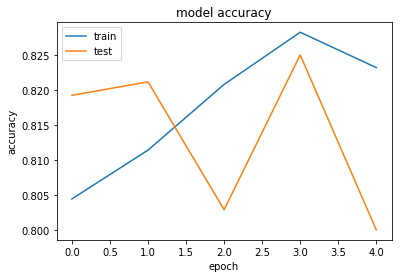

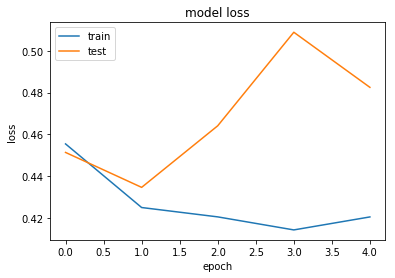

In [36]:
model2 = Sequential()
model2.add(Dense(400, activation='relu', input_shape=(11,)))
model2.add(Dense(600, activation='relu'))
model2.add(Dense(700, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_2 = model2.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=z)
plotting(model_2)

# Model 3 : 3 hidden layers

In [ ]:
model3 = Sequential()
model3.add(Dense(400, activation='relu', input_shape=(11,)))
model3.add(Dense(600, activation='relu'))
model3.add(Dense(700, activation='relu'))
model3.add(Dense(800, activation='relu'))
model3.add(Dense(3, activation='softmax'))
model3.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_3 = model3.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=z)
plotting(model_3)

# Model 4 : 4 hidden layers

In [ ]:
model4 = Sequential()
model4.add(Dense(400, activation='relu', input_shape=(11,)))
model4.add(Dense(600, activation='relu'))
model4.add(Dense(700, activation='relu'))
model4.add(Dense(800, activation='relu'))
model4.add(Dense(800, activation='relu'))
model4.add(Dense(3, activation='softmax'))
model4.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_4 = model4.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=z)
plotting(model_4)

# Model 5 : 5 hidden layers

In [ ]:
model5 = Sequential()
model5.add(Dense(400, activation='relu', input_shape=(11,)))
model5.add(Dense(600, activation='relu'))
model5.add(Dense(700, activation='relu'))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(3, activation='softmax'))
model5.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_5 = model5.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split = .2, verbose=2,callbacks=z)
plotting(model_5)